## numpy method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

In [16]:
class KNN:
    def __init__(self, k=3):
        self.k = k
        
    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)
        
#     def predict(self, X_test):
#         predictions = []
#         for x in X_test:
#             distances = np.sum(np.abs(self.X_train - x), axis=1) #L1 Distance
#             indices = np.argsort(distances)[:self.k]
#             k_nearest_labels = self.y_train[indices]
#             unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
#             predicted_label = unique_labels[np.argmax(counts)]
#             predictions.append(predicted_label)
            
#         return predictions
    
    def predict(self, X_test):
        predictions = []
        for x in X_test:
            distances = np.linalg.norm(self.X_train - x, axis=1) #Euclidean
            indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train[indices]
            unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
            predicted_label = unique_labels[np.argmax(counts)]
            predictions.append(predicted_label)
            
        return predictions
    
    def accuracy(self, X_test, y_test):
        predictions = self.predict(X_test)
        correct_predictions = np.sum(predictions == y_test)
        total_samples = len(y_test)
        accuracy_f = correct_predictions/total_samples
        return accuracy_f
    
    def plot_decision_boundary(self, X, y, resolution=0.02):
        cmap_light = ListedColormap(["#FFAAAA", "#AAAAFF"])
        cmap_bold = ListedColormap(["#FF0000", "#0000FF"])
        
        x_min, x_max = np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1
        y_min, y_max = np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1
        
        xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                             np.arange(y_min, y_max, resolution))
        
        Z = np.array(self.predict(np.c_[xx.ravel(), yy.ravel()]))
        
        Z = Z.reshape(xx.shape)
        plt.figure(figsize=(8,6))
        plt.contourf(xx, yy, Z, cmap = cmap_light, alpha=0.3)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=30)
        plt.title("KNN Decision Boundary")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.show()

In [17]:
#Load the dataset
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

In [18]:
#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

Accuracy 0.7555555555555555


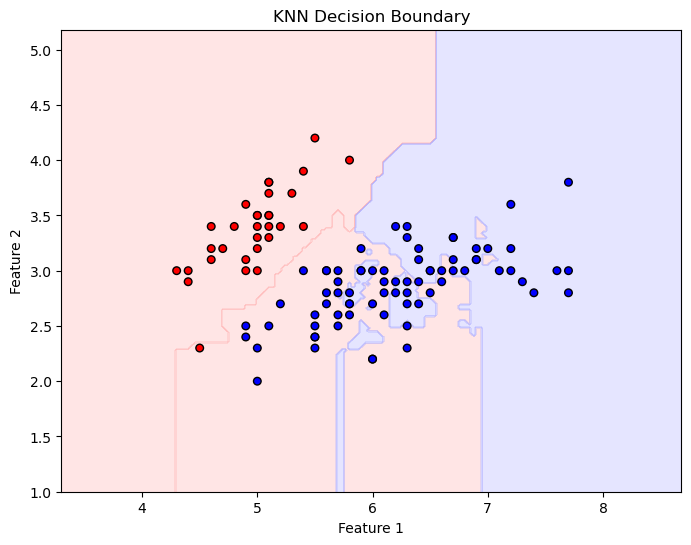

In [11]:
knn_classifier = KNN(k=3)
knn_classifier.fit(X_train, y_train)

accuracy = knn_classifier.accuracy(X_test, y_test)
print('Accuracy', accuracy)
knn_classifier.plot_decision_boundary(np.array(X_train), np.array(y_train))

Accuracy 0.7555555555555555


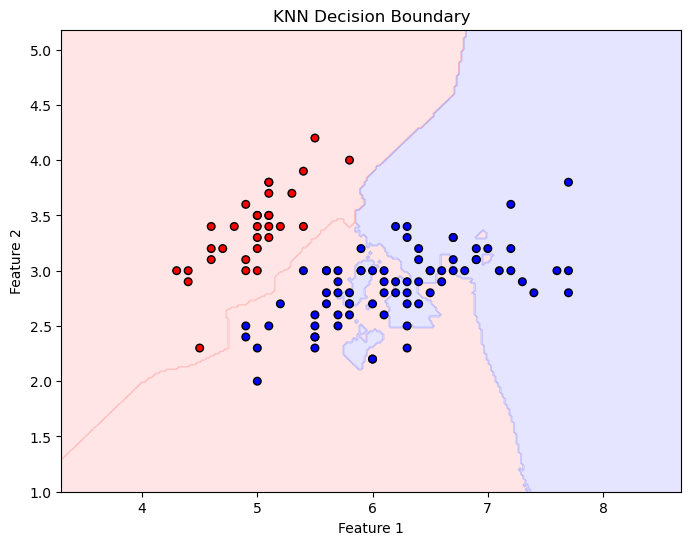

In [19]:
knn_classifier = KNN(k=3)
knn_classifier.fit(X_train, y_train)

accuracy = knn_classifier.accuracy(X_test, y_test)
print('Accuracy', accuracy)
knn_classifier.plot_decision_boundary(np.array(X_train), np.array(y_train))

## sklearn method

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

In [22]:
#Reduce data to 2 dimention using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [23]:
#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=.3, random_state=42)

In [24]:
k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k)

Accuracy 0.7555555555555555
Confusion Matrix [[19  0  0]
 [ 0  7  6]
 [ 0  5  8]]
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.58      0.54      0.56        13
           2       0.57      0.62      0.59        13

    accuracy                           0.76        45
   macro avg       0.72      0.72      0.72        45
weighted avg       0.76      0.76      0.76        45



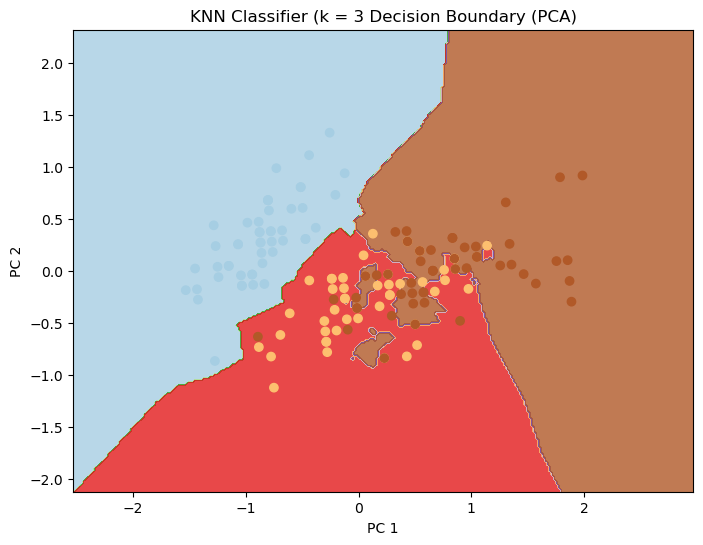

In [28]:
#Train the classifier
knn_classifier.fit(X_train, y_train)

#Make predictions
y_pred = knn_classifier.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classi_rep = classification_report(y_test, y_pred)

#Display the results
print("Accuracy", accuracy)
print("Confusion Matrix", conf_matrix)
print("Classification Report", classi_rep)

h = 0.02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, cmap = plt.cm.Paired, alpha=0.8)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap = plt.cm.Paired)
plt.title(f"KNN Classifier (k = {k} Decision Boundary (PCA)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()